# **Case Study - Lead Scoring**

### **Problem Statement**

X-Education is an education company sells online Education courses to professionals and marketing through online advertisements. Company gets the information through various different channels and if candidates enquiring with certain education level it calls it as a Lead. Typically lead conversion is 30% of certain education. Company identifying Hot Leads on certain criteria also. Lead conversion ratio is lesser than number of enrollment. The company has given a Target to achieve 80% of total enrollment.



#### **Goals of Case Study**

- Building Logistic regression model to finding leads for X-Education and help to achieve potential targets.
- Alternative approach to adjust future requirement, the model should be flexible and ready in case Company's requirement changes.

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt

#supress warnings
import warnings
warnings.filterwarnings('ignore')

# statsmodels libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Reading csv File

In [2]:
df = pd.read_csv('Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Data understanding and exploration

In [3]:
df.shape

(9240, 37)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

### Total 7 numerical columns and 30 categorical columns.

In [5]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Upon reviewing the data, we found that some columns are having 'Select' as values that were not captured.

In [6]:
#We can replace those 'Select' values with NaN

df = df.replace('Select', np.nan)

## Checking for Null Values

In [7]:
# Concatenating the Null Count, 'Null Percentage', 'Data Types' side by side
null_count = df.isnull().sum().sort_values(ascending = False)
null_percentage = df.isnull().mean() * 100
null_percentage = round(null_percentage, 2)
data_types = df.dtypes
missing_info = pd.concat([null_count, null_percentage, data_types], axis=1)
missing_info.columns = ['Null_Count', 'Null_%', 'Data Types']
print(missing_info)

                                               Null_Count  Null_% Data Types
How did you hear about X Education                   7250   78.46     object
Lead Profile                                         6855   74.19     object
Lead Quality                                         4767   51.59     object
Asymmetrique Profile Score                           4218   45.65    float64
Asymmetrique Activity Score                          4218   45.65    float64
Asymmetrique Activity Index                          4218   45.65     object
Asymmetrique Profile Index                           4218   45.65     object
City                                                 3669   39.71     object
Specialization                                       3380   36.58     object
Tags                                                 3353   36.29     object
What matters most to you in choosing a course        2709   29.32     object
What is your current occupation                      2690   29.11     object

### Checking for duplicate values

In [8]:
df.duplicated().sum()

0

## Dropping columns having more than 40% null values

In [9]:
drop_cols = list(df.columns[df.isnull().mean()*100 > 40])
print("Number of columns we can drop due to 40% missing values:",len(drop_cols), '\n\n', drop_cols)

Number of columns we can drop due to 40% missing values: 7 

 ['How did you hear about X Education', 'Lead Quality', 'Lead Profile', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [10]:
df = df.drop(drop_cols, axis=1)

In [11]:
#Dropping Lead Number and Prospect ID since they have all unique values

df.drop(['Prospect ID', 'Lead Number'], axis=1, inplace = True)
df.shape

(9240, 28)

In [12]:
df.isnull().sum().sort_values(ascending = False)

City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Receive More Updates About Our Courses              0
Update me on Supply Chain Content                   0
Lead Origin                                         0
Digital Advertisement                               0
Get updates on DM Content                           0
I agree to pay the amount through cheque            0
A free copy of Mastering The Interview              0
Through Recommendations                             0
Magazine                    

## Analyzing columns having null values

In [13]:
df.City.value_counts(dropna=False)

City
NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: count, dtype: int64

In [14]:
#Replacing the NaN city with mode i.e. Mumbai since it is a categorical column

df['City'] = df['City'].replace(np.nan,'Mumbai')

In [15]:
df.Specialization.value_counts(dropna=False)

Specialization
NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

In [16]:
#The Leads may not have specified specialization since it was not on the list,
#Also there may be some students who have not yet chosen any specialization. So, we will replace NaN values with 'Not Specified'

df['Specialization'] = df['Specialization'].replace(np.nan, 'Not Specified')

### Grouping 18 Specialization into 7

Business_and_Management
- Human Resource Management
- Operations Management
- Business Administration
- International Business

Technology_and_EBusiness
- IT Projects Management
- E-COMMERCE
- E-Business

SupplyChain_and_Retail
- Supply Chain Management
- Retail Management

Banking_and_Finance
- Banking, Investment And Insurance
- Finance Management

Hospitality_and_Healthcare
- Travel and Tourism
- Hospitality Management
- Healthcare Management

Media_and_Advertising
- Media and Advertising
- Marketing Management

Agribusiness_and_RuralManagement
- Rural and Agribusiness
- Services Excellence

In [17]:
#Business_and_Management
df['Specialization'] = df['Specialization'].replace(['Human Resource Management',
                                                      'Operations Management',
                                                      'Business Administration',
                                                      'International Business'],      'Business_and_Management')

#Technology_and_EBusiness
df['Specialization'] = df['Specialization'].replace(['IT Projects Management',
                                                      'E-COMMERCE',
                                                      'E-Business'],                 'Technology_and_EBusiness')

#SupplyChain_and_Operations
df['Specialization'] = df['Specialization'].replace(['Supply Chain Management',
                                                      'Retail Management'],          'SupplyChain_and_Retail')

#Banking_and_Finance
df['Specialization'] = df['Specialization'].replace(['Banking, Investment And Insurance',
                                                      'Finance Management'],         'Banking_and_Finance')

#Hospitality_and_Healthcare
df['Specialization'] = df['Specialization'].replace(['Travel and Tourism',
                                                      'Hospitality Management',
                                                      'Healthcare Management'],      'Hospitality_and_Healthcare')


#Media_and_Advertising
df['Specialization'] = df['Specialization'].replace(['Media and Advertising',
                                                      'Marketing Management'],       'Media_and_Advertising')


#Agribusiness_and_RuralManagement
df['Specialization'] = df['Specialization'].replace(['Rural and Agribusiness',
                                                      'Services Excellence'],        'Agribusiness_and_RuralManagement')

In [18]:
df.Specialization.value_counts()

Specialization
Not Specified                       3380
Business_and_Management             1932
Banking_and_Finance                 1314
Media_and_Advertising               1041
Technology_and_EBusiness             535
Hospitality_and_Healthcare           476
SupplyChain_and_Retail               449
Agribusiness_and_RuralManagement     113
Name: count, dtype: int64

In [19]:
df.Tags.value_counts(dropna=False)

Tags
NaN                                                  3353
Will revert after reading the email                  2072
Ringing                                              1203
Interested in other courses                           513
Already a student                                     465
Closed by Horizzon                                    358
switched off                                          240
Busy                                                  186
Lost to EINS                                          175
Not doing further education                           145
Interested  in full time MBA                          117
Graduation in progress                                111
invalid number                                         83
Diploma holder (Not Eligible)                          63
wrong number given                                     47
opp hangup                                             33
number not provided                                    27
in touch 

In [20]:
#Replacing NaN values with "Not Specified"
df['Tags'] = df['Tags'].replace(np.nan,'Not Specified')

In [21]:
#Replacing Tags having lower frequency(<100) with new category "Other Tags"

df['Tags'] = df['Tags'].replace(['invalid number',
                                'Diploma holder (Not Eligible)',
                                'wrong number given',
                                'opp hangup',
                                'number not provided',
                                'in touch with EINS',
                                'Lost to Others',
                                'Still Thinking',
                                'Want to take admission but has financial problems',
                                'In confusion whether part time or DLP',
                                'Interested in Next batch',
                                'Lateral student',
                                'Shall take in the next coming month',
                                'University not recognized',
                                'Recognition issue (DEC approval)'],          'Other_Tags')

In [22]:
df['What matters most to you in choosing a course'].value_counts(dropna=False)

What matters most to you in choosing a course
Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: count, dtype: int64

In [23]:
#Replacing the NaN with mode i.e. 'Better Career Prospects' since it is a categorical column

df['What matters most to you in choosing a course'] = df['What matters most to you in choosing a course'].replace(np.nan,'Better Career Prospects')

In [24]:
df['What is your current occupation'].value_counts(dropna=False)

What is your current occupation
Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: count, dtype: int64

In [25]:
#Replacing the NaN with mode i.e. 'Unemployed' since it is a categorical column

df['What is your current occupation'] = df['What is your current occupation'].replace(np.nan,'Unemployed')

In [26]:
# Renaming Some columns to shorter names

df.rename(columns = {"What is your current occupation":"Current_Occupation",
                     "What matters most to you in choosing a course":"Choosing_Course_Reason",
                     "A free copy of Mastering The Interview": "Free_copy_of_Interview"}, inplace = True)

In [27]:
df['Country'].value_counts(dropna=False)

Country
India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switze

In [28]:
#As the number of values for India is very high, this column can be dropped since it does not provide any variation

df.drop(['Country'], axis=1, inplace = True)

In [29]:
df.TotalVisits.value_counts(dropna=False)

TotalVisits
0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
NaN       137
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: count, dtype: int64

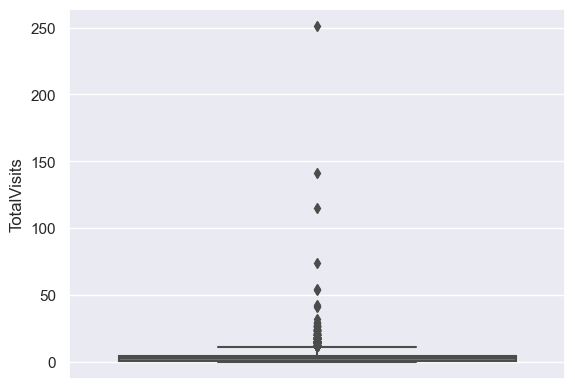

In [30]:
#Visualizing spread using boxplot of TotalVisits
#(The total number of visits made by the customer on the website.)

sns.boxplot(y=df['TotalVisits'])
plt.show()

In [31]:
#Treating outlier

df['TotalVisits'].describe(percentiles=[0.05,0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

### Handling Outliers

In [32]:
#function for outlier treatment to remove top and bottom 1% values

def outlier_treatment(df, col):
  Q3 = df[col].quantile(0.99)
  Q1 = df[col].quantile(0.01)
  df = df[(df[col] <= Q3) & (df[col] >= Q1)]

  sns.boxplot(y=df[col])   #boxplot
  plt.show()

  return df

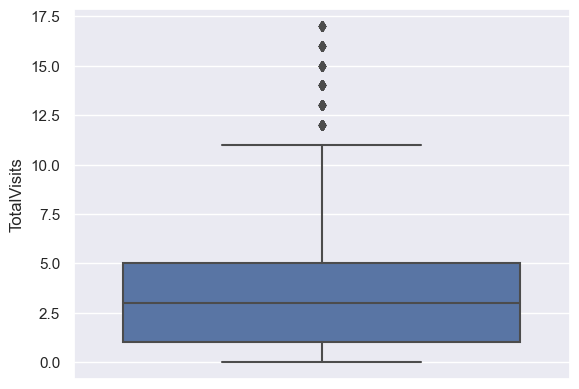

In [33]:
#Removing Outliers for TotalVisits

df = outlier_treatment(df, 'TotalVisits')

In [34]:
df['Page Views Per Visit'].value_counts(dropna=False)

Page Views Per Visit
0.00    2189
2.00    1792
3.00    1193
4.00     893
1.00     651
        ... 
1.31       1
2.13       1
2.14       1
1.63       1
1.17       1
Name: count, Length: 73, dtype: int64

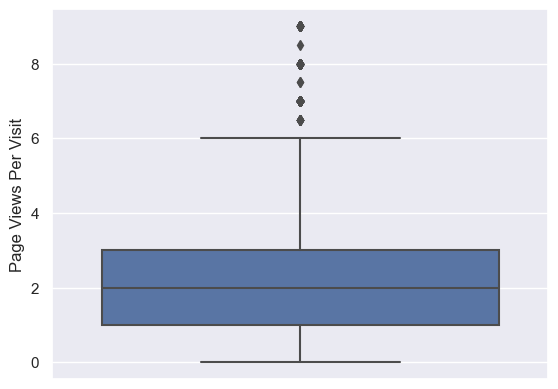

In [35]:
#Removing Outliers for 'Page Views Per Visit'

df = outlier_treatment(df, 'Page Views Per Visit')

In [36]:
# Last Activity
df['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                    3390
SMS Sent                        2700
Olark Chat Conversation          966
Page Visited on Website          594
Converted to Lead                428
Email Bounced                    310
Email Link Clicked               264
Form Submitted on Website        114
Unreachable                       88
Unsubscribed                      60
Had a Phone Conversation          24
Approached upfront                 5
View in browser link Clicked       4
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

In [37]:
#Replacing lower frequency(<100) with new category "Others" for "Last Activity"

df['Last Activity'] = df['Last Activity'].replace(['Unreachable',
                                                    'Unsubscribed',
                                                    'Had a Phone Conversation',
                                                    'Approached upfront',
                                                    'View in browser link Clicked',
                                                    'Email Received',
                                                    'Email Marked Spam',
                                                    'Visited Booth in Tradeshow',
                                                    'Resubscribed to emails'],          'Others')

In [38]:
df['Last Activity'].value_counts(dropna=False)

Last Activity
Email Opened                 3390
SMS Sent                     2700
Olark Chat Conversation       966
Page Visited on Website       594
Converted to Lead             428
Email Bounced                 310
Email Link Clicked            264
Others                        187
Form Submitted on Website     114
Name: count, dtype: int64

In [39]:
#Lead Source

df['Lead Source'].value_counts(dropna=False)

Lead Source
Google               2836
Direct Traffic       2499
Olark Chat           1751
Organic Search       1092
Reference             442
Welingak Website      129
Referral Sites        117
Facebook               31
NaN                    29
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Pay per Click Ads       1
blog                    1
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
testone                 1
Press_Release           1
NC_EDM                  1
Name: count, dtype: int64

In [40]:
#Clubbing similar spelling and common attributes Google and google and Facebook and Social Media are similar terms into single

df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')
df['Lead Source'] = df['Lead Source'].replace(['Facebook', 'youtubechannel'], 'Social Media')
df['Lead Source'] = df['Lead Source'].replace(['Referral Sites', 'Reference'], 'Referrals')

In [41]:
#Replacing lower frequency values with new category "Others" for "Lead Source"

df['Lead Source'] = df['Lead Source'].replace(np.nan,'Others')

df['Lead Source'] = df['Lead Source'].replace([ 'NaN',
                                                'bing',
                                                'Click2call',
                                                'Live Chat',
                                                'Pay per Click Ads',
                                                'blog',
                                                'WeLearn',
                                                'welearnblog_Home',
                                                'testone',
                                                'Press_Release',
                                                'NC_EDM'],          'Others')

In [42]:
df['Lead Source'].value_counts(dropna=False)

Lead Source
Google              2841
Direct Traffic      2499
Olark Chat          1751
Organic Search      1092
Referrals            559
Welingak Website     129
Others                48
Social Media          34
Name: count, dtype: int64

In [43]:
# After cleaning the data, concatenating the Null_Count and 'Data Types' side by side

null_count = df.isnull().sum().sort_values(ascending = False)
data_types = df.dtypes
missing_info = pd.concat([null_count, data_types], axis=1)
missing_info.columns = ['Null_Count', 'Data Types']
print(missing_info)

                                          Null_Count Data Types
Lead Origin                                        0     object
Newspaper Article                                  0     object
Free_copy_of_Interview                             0     object
I agree to pay the amount through cheque           0     object
City                                               0     object
Get updates on DM Content                          0     object
Update me on Supply Chain Content                  0     object
Tags                                               0     object
Receive More Updates About Our Courses             0     object
Through Recommendations                            0     object
Digital Advertisement                              0     object
Newspaper                                          0     object
X Education Forums                                 0     object
Magazine                                           0     object
Lead Source                             

In [44]:
df.shape

(8953, 27)

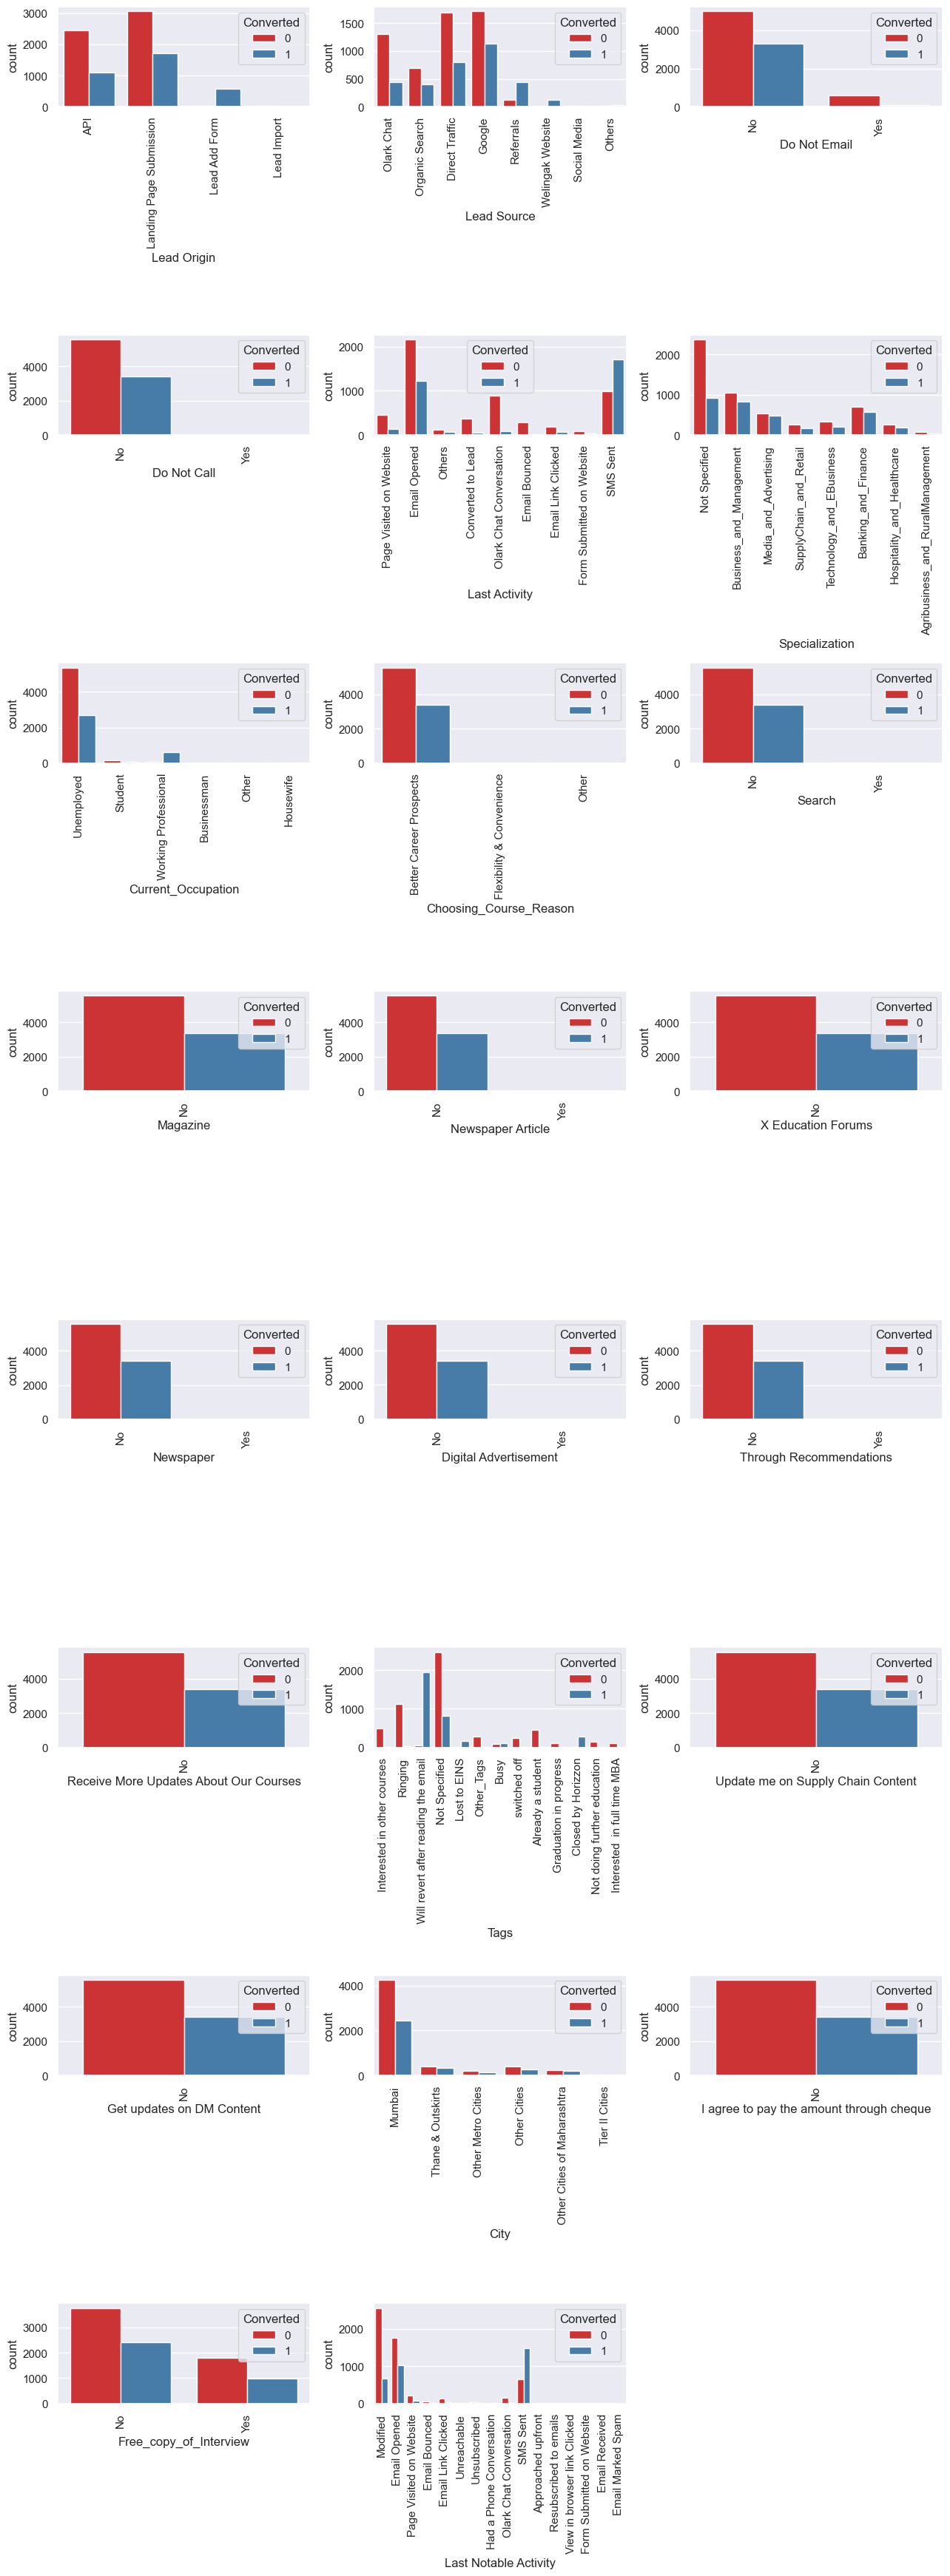

In [45]:
#plotting Countplot for Categorical Columns

row = 8  # number of rows
col = 3  # number of columns
counter = 1  # Initializing plot counter
fig = plt.figure(figsize=(13, 35))
for i in df.columns:
    if df[i].dtype in ["object"]:
        ax=plt.subplot(row, col, counter)
        sns.countplot(x=i, data=df, palette="Set1", hue='Converted')
        plt.xticks(rotation=90)
        counter += 1
fig.tight_layout()
plt.show()

### Dropping imbalanced columns which are heavily skewed or dominated by one category of values

In [46]:
#Dropping imbalanced columns

drop_cols = ['Search','Magazine','Newspaper Article','X Education Forums','Newspaper',
                 'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
                 'Update me on Supply Chain Content',
                 'Get updates on DM Content','I agree to pay the amount through cheque']

df = df.drop(drop_cols, axis=1)

In [47]:
df['Do Not Call'].value_counts()

Do Not Call
No     8951
Yes       2
Name: count, dtype: int64

In [48]:
df.Choosing_Course_Reason.value_counts()

Choosing_Course_Reason
Better Career Prospects      8951
Flexibility & Convenience       1
Other                           1
Name: count, dtype: int64

In [49]:
#Dropping 'Do Not Call' and 'Choosing_Course_Reason' columns since it has highly imbalanced values

df.drop(['Do Not Call'], axis=1, inplace=True)
df.drop(['Choosing_Course_Reason'], axis=1, inplace=True)

In [50]:
df.shape

(8953, 14)

In [51]:
df.nunique()

Lead Origin                       4
Lead Source                       8
Do Not Email                      2
Converted                         2
TotalVisits                      18
Total Time Spent on Website    1705
Page Views Per Visit             66
Last Activity                     9
Specialization                    8
Current_Occupation                6
Tags                             13
City                              6
Free_copy_of_Interview            2
Last Notable Activity            16
dtype: int64

In [52]:
df['Last Notable Activity'].value_counts()

Last Notable Activity
Modified                        3224
Email Opened                    2789
SMS Sent                        2143
Page Visited on Website          288
Olark Chat Conversation          182
Email Link Clicked               170
Email Bounced                     59
Unsubscribed                      46
Unreachable                       32
Had a Phone Conversation          13
Email Marked Spam                  2
Approached upfront                 1
Resubscribed to emails             1
View in browser link Clicked       1
Form Submitted on Website          1
Email Received                     1
Name: count, dtype: int64

In [53]:
#Replacing lower frequency values with new category "Others" for "Last Notable Activity"

df['Last Notable Activity'] = df['Last Notable Activity'].replace(['Unreachable',
                                                                    'Had a Phone Conversation',
                                                                    'Email Marked Spam',
                                                                    'Approached upfront',
                                                                    'Resubscribed to emails',
                                                                    'View in browser link Clicked',
                                                                    'Form Submitted on Website',
                                                                    'Email Received'],          'Others')

## Data Preparation

#### Converting Binary Columns (Yes/No) to 0/1 values

In [54]:
# Using map function
df['Do Not Email'] = df['Do Not Email'].map({'Yes': 1, 'No': 0})

df['Free_copy_of_Interview'] = df['Free_copy_of_Interview'].map({'Yes': 1, 'No': 0})

In [55]:
df.nunique()

Lead Origin                       4
Lead Source                       8
Do Not Email                      2
Converted                         2
TotalVisits                      18
Total Time Spent on Website    1705
Page Views Per Visit             66
Last Activity                     9
Specialization                    8
Current_Occupation                6
Tags                             13
City                              6
Free_copy_of_Interview            2
Last Notable Activity             9
dtype: int64

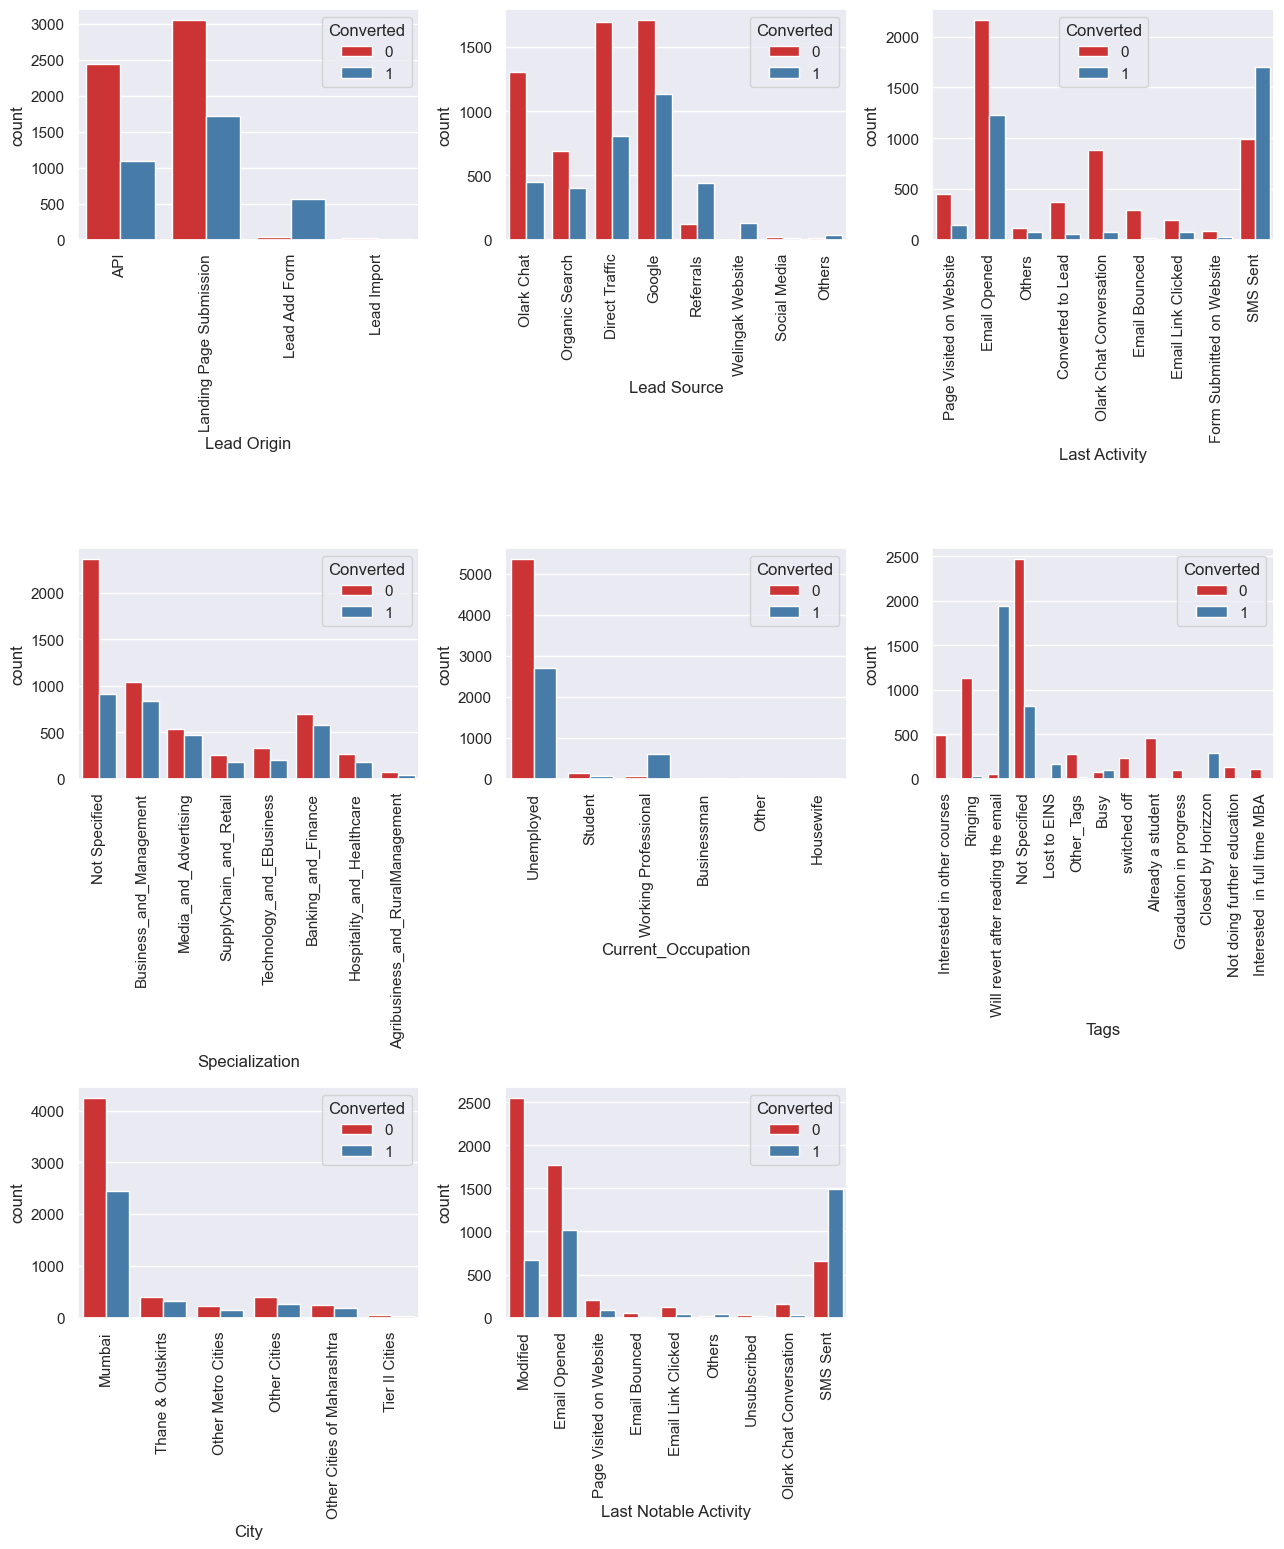

In [56]:
#plotting Countplot after cleaning variables

row = 7  # number of rows
col = 3  # number of columns
counter = 1  # Initializing plot counter
fig = plt.figure(figsize=(13, 35))
for i in df.columns:
    if df[i].dtype in ["object"]:
        ax=plt.subplot(row, col, counter)
        sns.countplot(x=i, data=df, palette="Set1", hue='Converted')
        plt.xticks(rotation=90)
        counter += 1
fig.tight_layout()
plt.show()

## Creating dummy variables for categorical columns

In [57]:
#Using get_dummies for creating dummy variables

def convert_categorical_to_dummies(df):
    categorical_columns = df.select_dtypes(include=['object']).columns     # Selecting columns with dtype 'object'
    df_dummies = pd.get_dummies(df, columns=categorical_columns, drop_first=True).astype(int)
    return df_dummies

In [58]:
df = convert_categorical_to_dummies(df)

In [59]:
df.shape

(8953, 61)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8953 entries, 0 to 9239
Data columns (total 61 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   Do Not Email                                   8953 non-null   int64
 1   Converted                                      8953 non-null   int64
 2   TotalVisits                                    8953 non-null   int64
 3   Total Time Spent on Website                    8953 non-null   int64
 4   Page Views Per Visit                           8953 non-null   int64
 5   Free_copy_of_Interview                         8953 non-null   int64
 6   Lead Origin_Landing Page Submission            8953 non-null   int64
 7   Lead Origin_Lead Add Form                      8953 non-null   int64
 8   Lead Origin_Lead Import                        8953 non-null   int64
 9   Lead Source_Google                             8953 non-null   int64
 10  Lead 

# Test-Train Split

In [61]:
# Putting 'Converted' variable to y and remaining with X
y = df['Converted']

X = df.drop('Converted', axis=1)

In [62]:
#Splitting the Data into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [63]:
X_train.shape

(6267, 60)

In [64]:
X_test.shape

(2686, 60)

In [65]:
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy_of_Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
count,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.00000,6267.000000,6267.000000,...,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,0.078506,3.123025,481.157651,2.167225,0.314824,0.532153,0.073081,0.00383,0.314824,0.193075,...,0.078666,0.008138,0.018031,0.311951,0.360460,0.020424,0.006223,0.031275,0.239509,0.005744
std,0.268988,2.895404,545.329481,1.880603,0.464483,0.499005,0.260291,0.06177,0.464483,0.394743,...,0.269238,0.089849,0.133074,0.463327,0.480172,0.141458,0.078647,0.174074,0.426818,0.075580
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,247.000000,2.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.000000,922.000000,3.000000,1.000000,1.000000,0.000000,0.00000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,17.000000,2272.000000,9.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
#Finding non-binary columns in train dataset

X_train.columns[X_train.nunique() > 2]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

# Feature Scaling

In [67]:
scaler = StandardScaler()
cols = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']
X_train[cols] = scaler.fit_transform(X_train[cols])

In [68]:
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy_of_Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
3385,0,-0.387896,-0.352398,-0.088928,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2273,0,-1.078701,-0.882395,-1.152502,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4234,0,0.302909,-0.678832,0.974646,1,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
945,0,-0.042493,-0.121327,0.442859,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
8689,0,-1.078701,-0.882395,-1.152502,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


# **Model Building**

### **Feature Selection Using RFE**

In [69]:
# initiate logistic regression
logReg = LogisticRegression()

rfe = RFE(logReg, n_features_to_select=15)    # running RFE with 15 variables
rfe = rfe.fit(X_train, y_train)

In [70]:
sorted(list(zip(X_train.columns, rfe.support_, rfe.ranking_)), key=lambda x: x[2])

[('Total Time Spent on Website', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_SMS Sent', True, 1),
 ('Tags_Busy', True, 1),
 ('Tags_Closed by Horizzon', True, 1),
 ('Tags_Lost to EINS', True, 1),
 ('Tags_Not Specified', True, 1),
 ('Tags_Ringing', True, 1),
 ('Tags_Will revert after reading the email', True, 1),
 ('Tags_switched off', True, 1),
 ('Last Notable Activity_Modified', True, 1),
 ('Last Notable Activity_Olark Chat Conversation', True, 1),
 ('Last Notable Activity_SMS Sent', True, 1),
 ('Tags_Graduation in progress', False, 2),
 ('Current_Occupation_Working Professional', False, 3),
 ('Do Not Email', False, 4),
 ('Lead Source_Others', False, 5),
 ('Last Notable Activity_Email Link Clicked', False, 6),
 ('Lead Source_Olark Chat', False, 7),
 ('Last Activity_Email Link Clicked', False, 8),
 ('Last Activity_Form Submitted on Website', False, 9),
 ('Last Activity_

In [71]:
# assign columns selected by Recursive Feature Elimination
rfe_cols = X_train.columns[rfe.support_]
rfe_cols

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_SMS Sent', 'Tags_Busy', 'Tags_Closed by Horizzon',
       'Tags_Lost to EINS', 'Tags_Not Specified', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')

In [72]:
# columns that were not selected by RFE
X_train.columns[~rfe.support_]

Index(['Do Not Email', 'TotalVisits', 'Page Views Per Visit',
       'Free_copy_of_Interview', 'Lead Origin_Lead Import',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Referrals', 'Lead Source_Social Media',
       'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website',
       'Specialization_Banking_and_Finance',
       'Specialization_Business_and_Management',
       'Specialization_Hospitality_and_Healthcare',
       'Specialization_Media_and_Advertising', 'Specialization_Not Specified',
       'Specialization_SupplyChain_and_Retail',
       'Specialization_Technology_and_EBusiness',
       'Current_Occupation_Housewife', 'Current_Occupation_Other',
       'Current_Occupation_Student', 'Cu

### Correlation using Heatmap

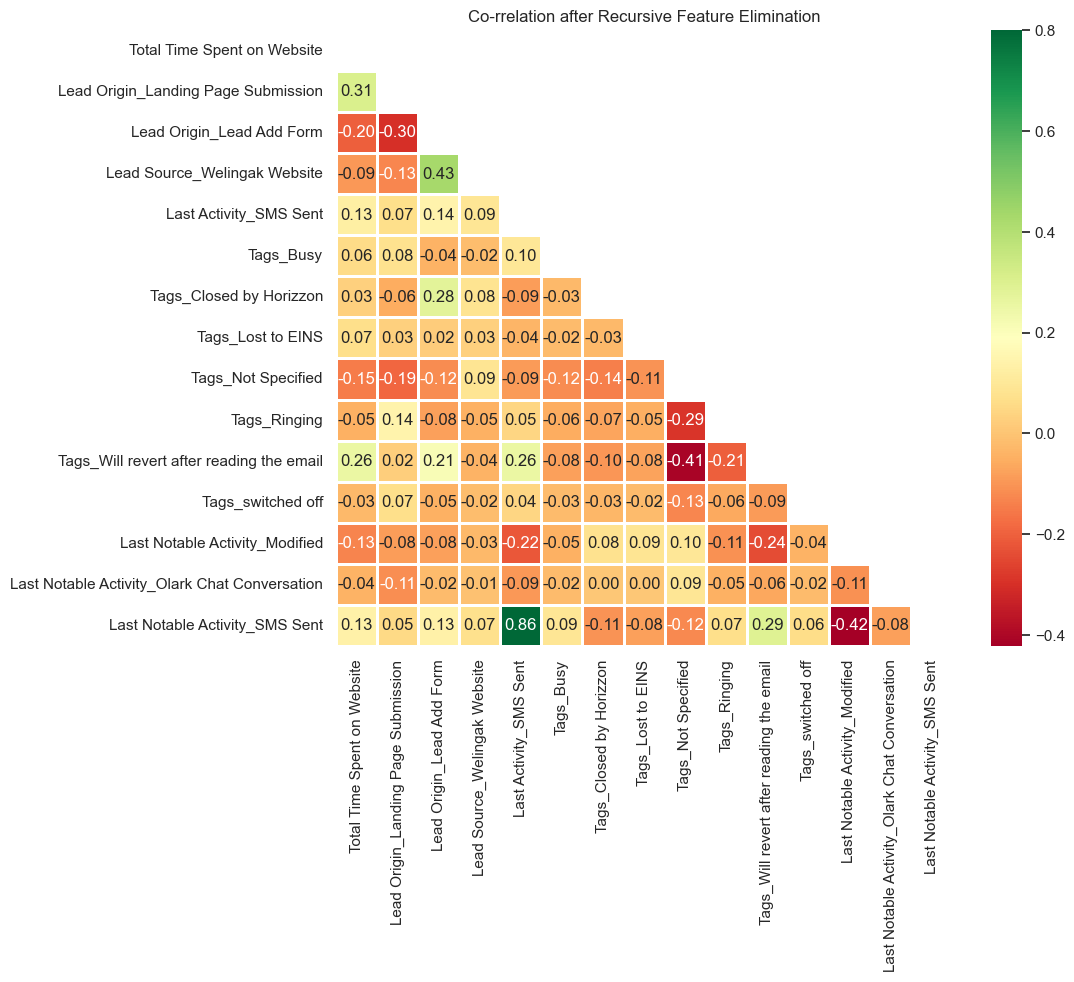

In [73]:
# Checking correlation among variables after rescaling

sns.set(style="white")
plt.figure(figsize = (10,8))
matrix = np.triu(X_train[rfe_cols].corr())
sns.heatmap(X_train[rfe_cols].corr(), annot = True, vmax=0.8, square=True, cmap="RdYlGn", fmt=".2f", mask=matrix, linewidths=2)
plt.title("Co-rrelation after Recursive Feature Elimination", fontsize=12)
plt.show()

In [74]:
# Generic function to build model using statsmodel library

def build_model(X):
    X_train_sm = sm.add_constant(X[rfe_cols])
    log = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
    res = log.fit()
    print(res.summary())     # model summary
    return X_train_sm

# Generic function to calculate VIF of variables using statsmodel library

def calculateVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X[rfe_cols].columns
    vif['VIF'] = [variance_inflation_factor(X[rfe_cols].values, i) for i in range(X[rfe_cols].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending=False)
    return vif

## Model 1: Assessing model with statsmodel

In [75]:
X_train1 = build_model(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6251
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1233.4
Date:                Mon, 19 Aug 2024   Deviance:                       2466.8
Time:                        19:31:11   Pearson chi2:                 9.15e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6092
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

### Some variables have p-values that are not within an acceptable range. We will compute the VIF to understand the variables multicollinearity and then pick which columns to drop.

In [76]:
calculateVIF(X_train1)

,Features,VIF
14,Last Notable Activity_SMS Sent,6.24
4,Last Activity_SMS Sent,6.10
1,Lead Origin_Landing Page Submission,2.11
10,Tags_Will revert after reading the email,1.87
2,Lead Origin_Lead Add Form,1.84
12,Last Notable Activity_Modified,1.76
8,Tags_Not Specified,1.66
9,Tags_Ringing,1.35
3,Lead Source_Welingak Website,1.31
0,Total Time Spent on Website,1.27


### 'Last Notable Activity_SMS Sent' has the highest VIF, hence we can drop it for now and recalculate the values.

In [77]:
#Removing variable with high VIF

rfe_cols = rfe_cols.drop(['Last Notable Activity_SMS Sent'])

## Model 2: Assessing model with statsmodel

In [78]:
X_train2 = build_model(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6252
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1238.6
Date:                Mon, 19 Aug 2024   Deviance:                       2477.1
Time:                        19:31:11   Pearson chi2:                 9.37e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6086
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [79]:
calculateVIF(X_train2)

,Features,VIF
1,Lead Origin_Landing Page Submission,2.11
2,Lead Origin_Lead Add Form,1.84
10,Tags_Will revert after reading the email,1.82
4,Last Activity_SMS Sent,1.67
8,Tags_Not Specified,1.63
12,Last Notable Activity_Modified,1.47
9,Tags_Ringing,1.34
3,Lead Source_Welingak Website,1.31
0,Total Time Spent on Website,1.27
6,Tags_Closed by Horizzon,1.24


 ## All VIF values are below 5 now, but the p-values for some variables are unacceptable.

In [80]:
# Removing 'Lead Origin_Lead Add Form' due to high p-value

rfe_cols = rfe_cols.drop(['Lead Origin_Lead Add Form'])

## Model 3: Assessing model with statsmodel

In [81]:
X_train3 = build_model(X_train)

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6267
Model:                            GLM   Df Residuals:                     6253
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1242.2
Date:                Mon, 19 Aug 2024   Deviance:                       2484.4
Time:                        19:31:11   Pearson chi2:                 9.16e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.6081
Covariance Type:            nonrobust                                         
                                                    coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------

In [82]:
calculateVIF(X_train3)

,Features,VIF
1,Lead Origin_Landing Page Submission,2.02
3,Last Activity_SMS Sent,1.65
7,Tags_Not Specified,1.62
9,Tags_Will revert after reading the email,1.55
11,Last Notable Activity_Modified,1.47
8,Tags_Ringing,1.33
0,Total Time Spent on Website,1.18
4,Tags_Busy,1.09
10,Tags_switched off,1.08
2,Lead Source_Welingak Website,1.07


## Since all p-value are less than 0.005 and VIF is less than 5 we can go ahead with model evualation

In [83]:
#Getting predicted values on train dataset 3

X_train_sm = sm.add_constant(X_train3[rfe_cols])
log = sm.GLM(y_train, X_train_sm, family=sm.families.Binomial())
res = log.fit()
y_train_pred = res.predict(X_train3)
y_train_pred.head()

3385    0.017478
2273    0.998535
4234    0.382000
945     0.002671
8689    0.027043
dtype: float64

In [84]:
#Re-shape y_train_pred to a 1D array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred

array([0.01747833, 0.99853473, 0.38199952, ..., 0.00362548, 0.00338798,
       0.17236812])

In [85]:
#Data frame with given convertion rate and probablity of predicted ones

y_train_pred_df = pd.DataFrame({'Converted': y_train.values, 'Converted_Probability': y_train_pred})
y_train_pred_df['Prospect ID'] = y_train.index
y_train_pred_df.head()

,Converted,Converted_Probability,Prospect ID
0,0,0.017478,3385
1,1,0.998535,2273
2,0,0.382000,4234
3,0,0.002671,945
4,0,0.027043,8689


In [86]:
# Substituting 0/1 with the cut off as 0.5 initially

y_train_pred_df['Predicted'] = y_train_pred_df.Converted_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_df.head()

,Converted,Converted_Probability,Prospect ID,Predicted
0,0,0.017478,3385,0
1,1,0.998535,2273,1
2,0,0.382000,4234,0
3,0,0.002671,945,0
4,0,0.027043,8689,0


# Model Evaluation

In [87]:
# Creating confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.Predicted)
confusion

array([[3679,  173],
       [ 277, 2138]])

In [88]:
#Evaluating model accuracy

model_accuracy = metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.Predicted)
print('Model accuracy :', round(model_accuracy *100, 4) , '%')

Model accuracy : 92.8195 %


In [89]:
# Calculating true positive
TP = confusion[1,1]

# Calculating true negatives
TN = confusion[0,0]

# Calculating false positives
FP = confusion[0,1]

# Calculating false negatives
FN = confusion[1,0]

In [90]:
# Calculating Sensitivity

sensitivity = TP/(TP+FN)
print('Model sensitivity :', round(sensitivity*100, 4), '%')

Model sensitivity : 88.53 %


In [91]:
# Calculating Specificity

specificity = TN/(TN+FP)
print('Model specificity is', round(specificity*100 ,4) , '%')

Model specificity is 95.5088 %


## With the current threshold value of 0.5,
### We get the following results for our model:
- Model Accuracy = 92.8195 %
- Model Sensitivity = 88.53 %
- Model Specificity = 95.5088 %

# Plotting ROC Curve

In [92]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    return None

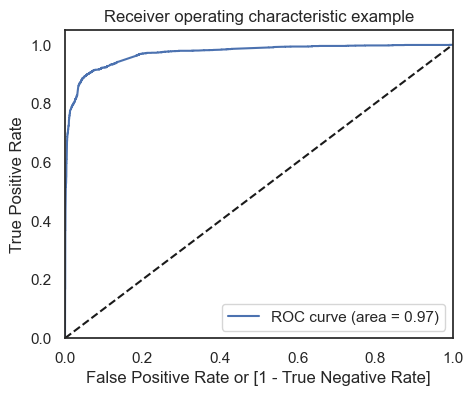

In [93]:
# Calling draw_roc function
draw_roc(y_train_pred_df.Converted, y_train_pred_df.Converted_Probability)

### The area under the ROC curve is 0.97, which seems pretty good.

## Finding Optimal Threshold Point other than 0.5 for model

In [94]:
# Creating columns with different probability cutoffs form 0 to 0.9

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Converted_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Converted,Converted_Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.017478,3385,0,1,0,0,0,0,0,0,0,0,0
1,1,0.998535,2273,1,1,1,1,1,1,1,1,1,1,1
2,0,0.382000,4234,0,1,1,1,1,0,0,0,0,0,0
3,0,0.002671,945,0,1,0,0,0,0,0,0,0,0,0
4,0,0.027043,8689,0,1,0,0,0,0,0,0,0,0,0


In [95]:
# let's calculate accuracy sensitivity & specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])

# TP = confusion[1,1] # true positive
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy  sensitivity  specificity
0.0   0.0  0.385352     1.000000     0.000000
0.1   0.1  0.840913     0.974327     0.757269
0.2   0.2  0.900750     0.932919     0.880582
0.3   0.3  0.920536     0.914286     0.924455
0.4   0.4  0.926121     0.897308     0.944185
0.5   0.5  0.928195     0.885300     0.955088
0.6   0.6  0.925802     0.866253     0.963136
0.7   0.7  0.910164     0.805797     0.975597
0.8   0.8  0.904899     0.773499     0.987279
0.9   0.9  0.887506     0.722567     0.990914


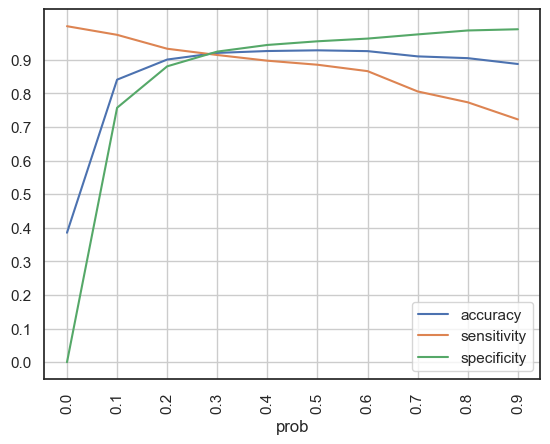

In [96]:
custom_bins = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.xticks(custom_bins,rotation=90)
plt.yticks(custom_bins)
plt.grid(True)
plt.show()

### From the plot, the optimal cut-off threshold value is 0.29 (where accuracy, sensitivity and specificity meet)

In [97]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Converted_Probability.map( lambda x: 1 if x > 0.29 else 0)
y_train_pred_df.head()

,Converted,Converted_Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.017478,3385,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.998535,2273,1,1,1,1,1,1,1,1,1,1,1,1
2,0,0.382000,4234,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.002671,945,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.027043,8689,0,1,0,0,0,0,0,0,0,0,0,0


In [98]:
#Assigning Lead Score to Training dataset

y_train_pred_df['Lead_Score'] = y_train_pred_df.Converted_Probability.map( lambda x: round(x*100))
y_train_pred_df.head()

,Converted,Converted_Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.017478,3385,0,1,0,0,0,0,0,0,0,0,0,0,2
1,1,0.998535,2273,1,1,1,1,1,1,1,1,1,1,1,1,100
2,0,0.382000,4234,0,1,1,1,1,0,0,0,0,0,0,1,38
3,0,0.002671,945,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.027043,8689,0,1,0,0,0,0,0,0,0,0,0,0,3


In [99]:
#Evaluating model accuracy

model_accuracy = metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)
print('Model accuracy :', round(model_accuracy *100, 4) , '%')

Model accuracy : 91.8621 %


In [100]:
#Creating confusion matrix

confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_predicted)
confusion

array([[3547,  305],
       [ 205, 2210]])

In [101]:
# Calculating true positive
TP = confusion[1,1]

# Calculating true negatives
TN = confusion[0,0]

# Calculating false positives
FP = confusion[0,1]

# Calculating false negatives
FN = confusion[1,0]

In [102]:
# Calculating Sensitivity

sensitivity = TP/(TP+FN)
print('Model sensitivity : ', round(sensitivity*100, 4), '%')

Model sensitivity :  91.5114 %


In [103]:
# Calculating Specificity

specificity = TN/(TN+FP)
print('Model specificity : ', round(specificity*100, 4) , '%')

Model specificity :  92.082 %


## With the optimal cut-off threshold value of 0.29,
### We get the following results for our model:

- Model Accuracy = 91.8621 %
- Model Sensitivity = 91.5114 %
- Model Specificity = 92.082 %


In [104]:
#Calculating Precision

Precision_rate = TP / (TP + FP)
print ('Precision rate : ', round(Precision_rate*100 , 4), '%')

Precision rate :  87.8728 %


In [105]:
#Calculating Recall

Recall_rate = TP / (TP + FN)
print ('Recall rate : ', round(Recall_rate * 100 , 4), '%')

Recall rate :  91.5114 %


In [106]:
#Calculating F1-Score

F1_score = 2 * Precision_rate * Recall_rate / (Precision_rate + Recall_rate)
print ('F1-Score : ', round(F1_score * 100 , 4), '%')

F1-Score :  89.6552 %


## Precision and Recall Tradeoff

In [107]:
from sklearn.metrics import precision_recall_curve

y_train_pred_df.Converted, y_train_pred_df.final_predicted
p, r, thresholds = precision_recall_curve(y_train_pred_df.Converted, y_train_pred_df.Converted_Probability)

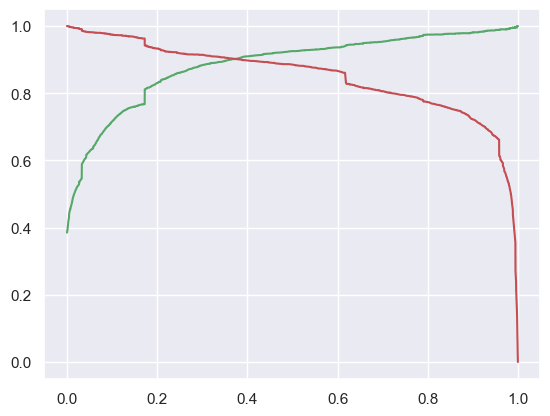

In [108]:
sns.set(style="darkgrid")
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## At 0.38 is the Precision and Recall tradeoff

In [109]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Converted_Probability.map( lambda x: 1 if x > 0.38 else 0)
y_train_pred_df.head()

,Converted,Converted_Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.017478,3385,0,1,0,0,0,0,0,0,0,0,0,0,2
1,1,0.998535,2273,1,1,1,1,1,1,1,1,1,1,1,1,100
2,0,0.382000,4234,0,1,1,1,1,0,0,0,0,0,0,1,38
3,0,0.002671,945,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.027043,8689,0,1,0,0,0,0,0,0,0,0,0,0,3


In [110]:
#Assigning Lead Score to Training dataset

y_train_pred_df['Lead_Score'] = y_train_pred_df.Converted_Probability.map( lambda x: round(x*100))
y_train_pred_df.head()

,Converted,Converted_Probability,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,Lead_Score
0,0,0.017478,3385,0,1,0,0,0,0,0,0,0,0,0,0,2
1,1,0.998535,2273,1,1,1,1,1,1,1,1,1,1,1,1,100
2,0,0.382000,4234,0,1,1,1,1,0,0,0,0,0,0,1,38
3,0,0.002671,945,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0.027043,8689,0,1,0,0,0,0,0,0,0,0,0,0,3


In [111]:
#Evaluating model accuracy for Precision and Recall tradeoff

model_accuracy = metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted)
print('Model accuracy for Precision and Recall tradeoff : ', round(model_accuracy *100, 4) , '%')

Model accuracy for Precision and Recall tradeoff :  92.4685 %


In [112]:
#Creating confusion matrix for Precision and Recall tradeoff

confusion = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_predicted)
confusion

array([[3620,  232],
       [ 240, 2175]])

In [113]:
# Calculating true positive
TP = confusion[1,1]

# Calculating true negatives
TN = confusion[0,0]

# Calculating false positives
FP = confusion[0,1]

# Calculating false negatives
FN = confusion[1,0]

In [114]:
# Calculating Sensitivity for Precision and Recall tradeoff

sensitivity = TP/(TP+FN)
print('Model sensitivity for Precision and Recall tradeoff : ', round(sensitivity*100, 4), '%')

Model sensitivity for Precision and Recall tradeoff :  90.0621 %


In [115]:
# Calculating Specificity for Precision and Recall tradeoff

specificity = TN/(TN+FP)
print('Model specificity for Precision and Recall tradeoff : ', round(specificity*100, 4) , '%')

Model specificity for Precision and Recall tradeoff :  93.9772 %


# Test Model Predictions

In [116]:
#Making predictions on test dataset

X_test[cols] = scaler.transform(X_test[cols])
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Free_copy_of_Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unsubscribed
5098,0,-1.078701,-0.882395,-1.152502,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4535,0,-0.387896,0.337149,-0.088928,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3190,0,0.302909,2.051845,0.974646,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7457,0,0.648312,-0.528452,1.506433,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6974,0,-1.078701,-0.882395,-1.152502,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [117]:
#Adding a constant to X_test

X_test_sm = sm.add_constant(X_test[rfe_cols])
X_test_sm.head()

,const,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Source_Welingak Website,Last Activity_SMS Sent,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Not Specified,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
5098,1.0,-0.882395,0,0,0,0,0,0,1,0,0,0,0,1
4535,1.0,0.337149,1,0,1,0,0,0,1,0,0,0,0,0
3190,1.0,2.051845,0,0,1,0,0,0,1,0,0,0,0,0
7457,1.0,-0.528452,0,0,0,0,0,0,0,0,0,0,1,0
6974,1.0,-0.882395,0,0,1,0,0,0,0,0,1,0,0,0


In [118]:
# Storing prediction of test dataset in variable 'y_test_pred'

y_test_pred = res.predict(X_test_sm)
y_test_pred.head()

5098    0.042570
4535    0.618878
3190    0.963211
7457    0.006303
6974    0.994401
dtype: float64

In [119]:
# Coverting y_test_pred to DataFrame
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [120]:
# Putting Prospect ID to index

y_test_df['Prospect ID'] = y_test_df.index

# Removing index for both dataframes to append

y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Appending y_test_df and y_pred_df

y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column to Converted_Probability

y_pred_final = y_pred_final.rename(columns = {0 : 'Converted_Probability'})
y_pred_final.head()

,Converted,Prospect ID,Converted_Probability
0,0,5098,0.042570
1,1,4535,0.618878
2,1,3190,0.963211
3,0,7457,0.006303
4,1,6974,0.994401


In [121]:
# Rearranging columns as initial

y_pred_final = y_pred_final.reindex(columns=['Prospect ID', 'Converted', 'Converted_Probability'])
y_pred_final.head()

,Prospect ID,Converted,Converted_Probability
0,5098,0,0.042570
1,4535,1,0.618878
2,3190,1,0.963211
3,7457,0,0.006303
4,6974,1,0.994401


In [122]:
# Making prediction using cut off 0.29

y_pred_final['final_predicted'] = y_pred_final.Converted_Probability.map(lambda x: 1 if x > 0.29 else 0)
y_pred_final.head()

,Prospect ID,Converted,Converted_Probability,final_predicted
0,5098,0,0.042570,0
1,4535,1,0.618878,1
2,3190,1,0.963211,1
3,7457,0,0.006303,0
4,6974,1,0.994401,1


In [123]:
# Evaluating test model accuracy

model_accuracy = metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)
print('Test model accuracy : ', round(model_accuracy *100, 4) , '%')

Test model accuracy :  92.3678 %


In [124]:
#Creating confusion matrix

confusion = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion

array([[1570,  136],
       [  69,  911]])

In [125]:
# Calculating true positive
TP = confusion[1,1]

# Calculating true negatives
TN = confusion[0,0]

# Calculating false positives
FP = confusion[0,1]

# Calculating false negatives
FN = confusion[1,0]

In [126]:
# Calculating Sensitivity

sensitivity = TP/(TP+FN)
print('Test Model sensitivity :', round(sensitivity*100, 4), '%')

Test Model sensitivity : 92.9592 %


In [127]:
# Calculating Specificity

specificity = TN/(TN+FP)
print('Test Model specificity is', round(specificity*100 ,4) , '%')

Test Model specificity is 92.0281 %


## With the optimal cut-off threshold value of 0.29,
### We get the following results for TEST model:

- Test Model Accuracy = 92.3678 %
- Test Model Sensitivity = 92.9592 %
- Test Model Specificity = 92.0281 %

In [128]:
#Calculating Precision

Precision_rate = TP / (TP + FP)
print ('Test Precision rate : ', round(Precision_rate*100 , 4), '%')

Test Precision rate :  87.0105 %


In [129]:
#Calculating Recall

Recall_rate = TP / (TP + FN)
print ('Test Recall rate : ', round(Recall_rate * 100 , 4), '%')

Test Recall rate :  92.9592 %


In [130]:
#Calculating F1-Score

F1_score = 2 * Precision_rate * Recall_rate / (Precision_rate + Recall_rate)
print ('Test F1-Score : ', round(F1_score * 100 , 4), '%')

Test F1-Score :  89.8865 %


# Assigning Lead Score to Test dataset

In [131]:
y_pred_final['Lead_Score'] = y_pred_final.Converted_Probability.map( lambda x: round(x*100))
y_pred_final.head()

,Prospect ID,Converted,Converted_Probability,final_predicted,Lead_Score
0,5098,0,0.042570,0,4
1,4535,1,0.618878,1,62
2,3190,1,0.963211,1,96
3,7457,0,0.006303,0,1
4,6974,1,0.994401,1,99


In [132]:
#Finding Good Leads for Conversion

good_leads = y_pred_final.loc[y_pred_final["Lead_Score"] >= 80]
good_leads

,Prospect ID,Converted,Converted_Probability,final_predicted,Lead_Score
2,3190,1,0.963211,1,96
4,6974,1,0.994401,1,99
11,1588,1,0.973488,1,97
25,8144,1,0.891566,1,89
29,3249,1,0.994733,1,99
...,...,...,...,...,...
2674,5503,0,0.847567,1,85
2675,5093,1,0.994401,1,99
2678,2783,1,0.997724,1,100
2680,35,1,0.816366,1,82


## Customers with a Lead score of 80% or higher can be treated as "Good Leads" and can be approached for positive conversion.

### Based on Test Model we have identified 808 "Good Leads".

In [133]:
parameters = res.params.sort_values(ascending=False)
parameters

Tags_Closed by Horizzon                          9.876544
Tags_Lost to EINS                                8.600111
Tags_Will revert after reading the email         6.717868
Lead Source_Welingak Website                     5.022580
Tags_Busy                                        2.811943
Last Activity_SMS Sent                           2.044515
Tags_Not Specified                               2.013967
Total Time Spent on Website                      0.950666
Lead Origin_Landing Page Submission             -1.150170
Tags_Ringing                                    -1.249182
Last Notable Activity_Olark Chat Conversation   -1.544177
Last Notable Activity_Modified                  -1.813905
Tags_switched off                               -2.381650
const                                           -2.744041
dtype: float64

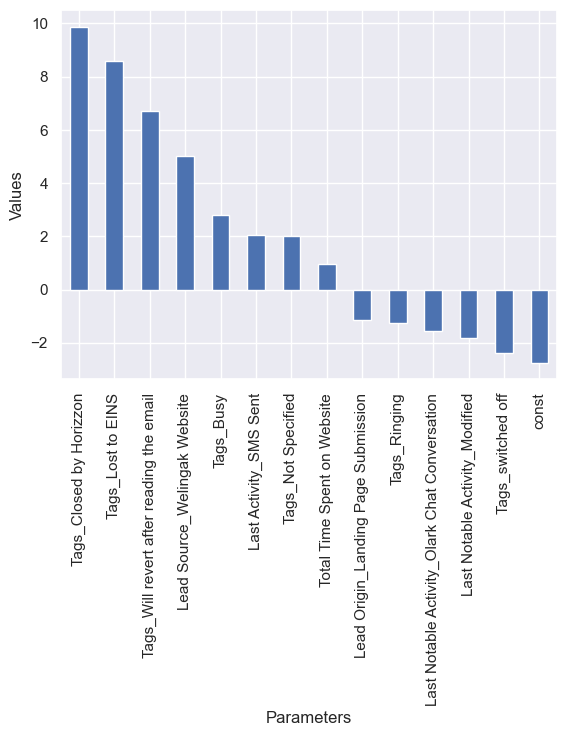

In [134]:
#plotting all the parameters
sns.set(style="darkgrid")
parameters.plot(kind='bar')
plt.xlabel('Parameters')
plt.ylabel('Values')
plt.show()

### Top 3 features contributing most towards lead conversion:

- Tags_Closed by Horizzon : 9.876544
- Tags_Lost to EINS	: 8.600111
- Tags_Will revert after reading the email : 6.717868

## Some Recommendations:-

### To increase Lead Conversion Rates for X-Education:

- Create strategies for generating high-quality leads from top-performing lead sources.
- Optimize communication channels depending on lead engagement impact. In terms of advertising, more budget/spend may be allocated to Tags Closed by Horizzon and the Welingak Website.
- Incentives/discounts for providing references that convert to leads to promote more referrals.
- Working professionals can be aggressively targeted since they have a high conversion rate and can afford to pay higher costs.


## Areas of improvement:
- Analyze negative coefficients in specialization offerings.
- Review landing page submission process for areas of improvement.